### 导库导数据，探索特征

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data\weather.csv",index_col=0)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [3]:
df.shape

(142193, 22)

In [4]:
#抽取 5000条样本进行后续处理
weather = df.sample(n=5000,random_state=0)
weather.index = range(weather.shape[0])
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,...,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,No
1,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,...,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,No
2,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,...,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0,No
3,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,...,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,No
4,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,...,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,No


In [5]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [6]:
#将特征矩阵和标签Y分开
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4968 non-null float64
MaxTemp          4986 non-null float64
Rainfall         4937 non-null float64
Evaporation      2813 non-null float64
Sunshine         2592 non-null float64
WindGustDir      4640 non-null object
WindGustSpeed    4642 non-null float64
WindDir9am       4650 non-null object
WindDir3pm       4854 non-null object
WindSpeed9am     4951 non-null float64
WindSpeed3pm     4896 non-null float64
Humidity9am      4947 non-null float64
Humidity3pm      4869 non-null float64
Pressure9am      4459 non-null float64
Pressure3pm      4458 non-null float64
Cloud9am         3123 non-null float64
Cloud3pm         2989 non-null float64
Temp9am          4974 non-null float64
Temp3pm          4895 non-null float64
dtypes: float64(16), object(5)
memory usage: 820.4+ KB


In [8]:
#探索特征缺失值
X.isnull().mean()

Date             0.0000
Location         0.0000
MinTemp          0.0064
MaxTemp          0.0028
Rainfall         0.0126
Evaporation      0.4374
Sunshine         0.4816
WindGustDir      0.0720
WindGustSpeed    0.0716
WindDir9am       0.0700
WindDir3pm       0.0292
WindSpeed9am     0.0098
WindSpeed3pm     0.0208
Humidity9am      0.0106
Humidity3pm      0.0262
Pressure9am      0.1082
Pressure3pm      0.1084
Cloud9am         0.3754
Cloud3pm         0.4022
Temp9am          0.0052
Temp3pm          0.0210
dtype: float64

In [9]:
#探索标签的分类
np.unique(Y)

array(['No', 'Yes'], dtype=object)

In [10]:
#分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)

In [11]:
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [14]:
#将标签编码
from sklearn.preprocessing import LabelEncoder
encorder = LabelEncoder().fit(Ytrain)
Ytrain = pd.DataFrame(encorder.transform(Ytrain))
Ytest = pd.DataFrame(encorder.transform(Ytest))

### 处理异常值

In [15]:
#描述性统计
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3477.0,12.340236,6.384294,-6.9,-2.024,2.1,4.3,7.700,12.1,17.0,20.9,25.824,29.1
MaxTemp,3492.0,23.232904,6.992256,-4.1,8.900,12.7,14.6,18.200,22.7,28.1,32.8,39.600,43.7
Rainfall,3460.0,2.106618,6.570495,0.0,0.000,0.0,0.0,0.000,0.0,0.8,6.0,35.400,102.0
Evaporation,1986.0,5.398489,3.837948,0.0,0.400,1.0,1.4,2.725,4.8,7.4,9.8,17.430,52.4
Sunshine,1835.0,7.723869,3.691531,0.0,0.000,0.4,2.0,5.100,8.5,10.6,12.0,13.400,14.3
WindGustSpeed,3254.0,39.878611,13.492322,9.0,15.000,20.0,24.0,31.000,39.0,46.0,57.0,81.000,115.0
WindSpeed9am,3470.0,13.924784,8.861956,0.0,0.000,0.0,4.0,7.000,13.0,19.0,26.0,39.000,52.0
WindSpeed3pm,3426.0,18.765032,8.915825,0.0,2.000,6.0,7.0,13.000,19.0,24.0,30.0,43.000,78.0
Humidity9am,3460.0,68.844509,18.918369,5.0,18.000,35.0,44.0,57.000,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3405.0,51.628781,20.705426,1.0,9.000,17.0,24.0,37.000,52.0,65.0,79.6,97.960,100.0


In [16]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1491.0,12.211335,6.458887,-6.3,-2.500,1.50,3.90,7.6,12.2,16.800,20.70,25.610,28.5
MaxTemp,1494.0,23.330857,7.380122,-0.6,7.686,12.60,14.40,18.0,22.7,28.775,33.50,40.500,44.4
Rainfall,1477.0,2.338456,8.114066,0.0,0.000,0.00,0.00,0.0,0.0,0.800,6.20,31.632,164.2
Evaporation,827.0,5.492745,4.007532,0.0,0.200,0.80,1.40,2.6,4.8,7.600,10.40,16.000,58.5
Sunshine,757.0,7.756803,3.815881,0.0,0.000,0.48,1.66,4.9,8.6,10.700,12.30,13.400,14.0
WindGustSpeed,1388.0,40.164986,14.144410,11.0,15.000,20.00,24.00,30.0,39.0,48.000,57.00,87.000,102.0
WindSpeed9am,1481.0,14.135719,9.018514,0.0,0.000,0.00,4.00,7.0,13.0,19.000,26.00,37.400,72.0
WindSpeed3pm,1470.0,18.759184,9.002335,0.0,2.000,6.00,8.80,13.0,19.0,24.000,30.00,44.620,65.0
Humidity9am,1487.0,67.854069,19.342026,8.0,16.860,32.30,42.60,56.0,68.0,83.000,94.00,100.000,100.0
Humidity3pm,1464.0,50.962432,21.100400,4.0,8.000,15.00,23.00,35.0,52.0,65.000,79.00,97.370,100.0


In [17]:
#提取出所有的数值型特征的列名
col = Xtrain.mean().index

In [18]:
#查看训练集各列异常值的比例
(np.abs((Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum()/Xtrain.shape[0]

MinTemp          0.000286
MaxTemp          0.002286
Rainfall         0.021714
Evaporation      0.006286
Sunshine         0.000000
WindGustSpeed    0.010571
WindSpeed9am     0.009714
WindSpeed3pm     0.006000
Humidity9am      0.003714
Humidity3pm      0.000000
Pressure9am      0.003429
Pressure3pm      0.002857
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.001143
Temp3pm          0.002571
dtype: float64

In [19]:
#提取出所有训练集所有异常值的索引
deltrain = []
for i in col:
    bool_ = np.abs((Xtrain.loc[:,i] - Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtrain[bool_].index
    deltrain.extend(list(ind))

In [20]:
#去重之后有异常值的行索引
deltrain1 = list(set(deltrain)) 

In [21]:
len(deltrain1)

199

In [22]:
#查看测试集各列缺失值（注意这里的均值和方差需要用训练集的）
(np.abs((Xtest.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum()/Xtest.shape[0]

MinTemp          0.000000
MaxTemp          0.004000
Rainfall         0.024667
Evaporation      0.004667
Sunshine         0.000000
WindGustSpeed    0.013333
WindSpeed9am     0.007333
WindSpeed3pm     0.010000
Humidity9am      0.004667
Humidity3pm      0.000000
Pressure9am      0.004000
Pressure3pm      0.004000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000667
Temp3pm          0.005333
dtype: float64

In [23]:
#提取出测试集的所有异常值的索引
deltest = []
for i in col:
    bool_ = np.abs((Xtest.loc[:,i] - Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtest[bool_].index
    deltest.extend(list(ind))

In [24]:
#去重之后有异常值的行索引
deltest1 = list(set(deltest)) 

In [25]:
len(deltest1)

90

In [27]:
#删除训练集特征的异常值
Xtrain = Xtrain.drop(index=deltrain1)

In [29]:
Xtrain.shape

(3301, 21)

In [32]:
#删除训练集标签的异常值
Ytrain = Ytrain.drop(index=deltrain1)

In [33]:
Ytrain.shape

(3301, 1)

In [28]:
#删除测试集特征的异常值
Xtest= Xtest.drop(index=deltest1)

In [30]:
Xtest.shape

(1410, 21)

In [34]:
#删除测试集标签的异常值
Ytest= Ytest.drop(index=deltest1)

In [35]:
Ytest.shape

(1410, 1)

In [36]:
#进行任何行删除之后，千万记得要恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [39]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
3,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
4,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4


In [40]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-07-16,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,2.0,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6
1,2015-04-28,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,0.0,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0
2,2015-03-21,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,9.0,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4
3,2009-02-22,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,17.0,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5
4,2017-02-20,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,15.0,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8


### 处理日期

In [55]:
Xtrain.iloc[:,0].value_counts()

2015-11-06    6
2009-08-23    6
2015-01-18    5
2015-10-10    5
2015-02-09    5
2009-11-29    5
2016-02-21    5
2009-02-22    5
2015-07-13    5
2013-08-22    5
2011-09-11    5
2009-08-14    5
2015-02-06    5
2014-04-18    4
2014-12-22    4
2010-04-03    4
2017-05-29    4
2016-07-15    4
2015-11-27    4
2012-06-15    4
2015-08-20    4
2011-10-22    4
2009-02-01    4
2011-07-21    4
2010-01-25    4
2013-09-09    4
2014-04-12    4
2010-03-18    4
2016-04-09    4
2009-01-05    4
             ..
2011-02-07    1
2010-01-14    1
2009-12-01    1
2014-08-18    1
2016-07-09    1
2013-08-16    1
2014-03-07    1
2017-06-12    1
2017-02-13    1
2010-09-29    1
2010-02-20    1
2014-06-06    1
2009-09-07    1
2016-04-18    1
2009-07-12    1
2008-10-03    1
2013-12-07    1
2015-10-17    1
2015-09-12    1
2013-01-24    1
2013-09-12    1
2015-01-25    1
2013-12-28    1
2013-09-04    1
2009-09-11    1
2017-01-21    1
2010-09-22    1
2009-11-16    1
2013-01-07    1
2017-03-18    1
Name: Date, Length: 2025

In [54]:
Xtrain.iloc[:,0].value_counts().count()

2025

In [56]:
Xtrain["Rainfall"].head(20)

Xtrain.loc[Xtrain["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtrain.loc[Xtrain["Rainfall"] < 1,"RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan

Xtest.loc[Xtest["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"] < 1,"RainToday"] = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

Xtrain.head()
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-07-16,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6,No
1,2015-04-28,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0,No
2,2015-03-21,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4,No
3,2009-02-22,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5,No
4,2017-02-20,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8,Yes


In [47]:
int(Xtrain.loc[0,"Date"].split("-")[1]) #提取出月份

3

In [57]:
Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1]))
Xtrain = Xtrain.rename(columns={"Date":"Month"})
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2,No
1,9,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6,No
2,7,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5,Yes
3,1,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2,No
4,2,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4,No


In [58]:
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6,No
1,4,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0,No
2,3,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4,No
3,2,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5,No
4,2,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8,Yes


### 处理分类变量：缺失值

In [60]:
#查看缺失值的缺失情况
Xtrain.isnull().mean()

Month            0.000000
Location         0.000000
MinTemp          0.006968
MaxTemp          0.002121
Rainfall         0.011512
Evaporation      0.432899
Sunshine         0.475613
WindGustDir      0.069979
WindGustSpeed    0.069676
WindDir9am       0.073614
WindDir3pm       0.029991
WindSpeed9am     0.008482
WindSpeed3pm     0.021509
Humidity9am      0.010906
Humidity3pm      0.027264
Pressure9am      0.102999
Pressure3pm      0.103302
Cloud9am         0.369888
Cloud3pm         0.396547
Temp9am          0.004847
Temp3pm          0.021206
RainToday        0.011512
dtype: float64

In [61]:
#首先找出，分类型特征都有哪些
cate = Xtrain.columns[Xtrain.dtypes == "object"].tolist()

In [62]:
cate

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [63]:
#除了特征类型为"object"的特征们，还有虽然用数字表示，但是本质为分类型特征的云层遮蔽程度
cloud = ["Cloud9am","Cloud3pm"]
cate = cate + cloud
cate

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [64]:
#对于分类型特征，我们使用众数来进行填补
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
#注意，我们使用训练集数据来训练我们的填补器，本质是在生成训练集中的众数
si.fit(Xtrain.loc[:,cate])

#然后我们用训练集中的众数来同时填补训练集和测试集
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

Xtrain.head()
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,7.0,94.0,54.0,NaN,NaN,7.0,7.0,1.9,10.6,No
1,4,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,N,...,9.0,68.0,46.0,1030.8,1028.4,7.0,7.0,14.1,16.0,No
2,3,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4,No
3,2,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5,No
4,2,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8,Yes


In [65]:
#查看分类型特征是否依然存在缺失值
Xtrain.loc[:,cate].isnull().mean()

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [66]:
Xtest.loc[:,cate].isnull().mean()

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [67]:
#将所有的分类型变量编码为数字，一个类别是一个数字
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

#利用训练集进行fit
oe = oe.fit(Xtrain.loc[:,cate])

#用训练集的编码结果来编码训练和测试特征矩阵
#在这里如果测试特征矩阵报错，就说明测试集中出现了训练集中从未见过的类别
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

Xtrain.loc[:,cate].head()
Xtest.loc[:,cate].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,17.0,9.0,0.0,8.0,0.0,7.0,7.0
1,0.0,9.0,3.0,2.0,0.0,7.0,7.0
2,33.0,0.0,9.0,2.0,0.0,8.0,1.0
3,33.0,2.0,2.0,9.0,0.0,6.0,3.0
4,33.0,11.0,12.0,12.0,1.0,7.0,8.0


### 处理连续型变量：填补缺失值

In [68]:
col = Xtrain.columns.tolist()
for i in cate:
    col.remove(i)

In [69]:
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [70]:
#实例化模型，填补策略为"mean"表示均值
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")
#用训练集来fit模型
impmean = impmean.fit(Xtrain.loc[:,col])
#分别在训练集和测试集上进行均值填补
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

Xtrain.head()
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7.0,17.0,-0.6,10.8,0.0,5.173344,7.826516,9.0,20.0,0.0,...,7.0,94.0,54.0,1017.898109,1015.46,7.0,7.0,1.9,10.6,0.0
1,4.0,0.0,8.7,16.7,0.0,1.600000,7.826516,9.0,22.0,3.0,...,9.0,68.0,46.0,1030.800000,1028.40,7.0,7.0,14.1,16.0,0.0
2,3.0,33.0,7.7,19.0,0.0,5.400000,10.300000,0.0,33.0,9.0,...,15.0,62.0,50.0,1027.700000,1026.00,8.0,1.0,13.9,18.4,0.0
3,2.0,33.0,14.8,21.7,0.0,2.200000,12.500000,2.0,33.0,2.0,...,19.0,61.0,47.0,1018.500000,1015.20,6.0,3.0,15.9,21.5,0.0
4,2.0,33.0,10.8,18.2,2.0,5.173344,7.826516,11.0,37.0,12.0,...,22.0,74.0,55.0,1015.800000,1016.70,7.0,8.0,13.1,16.8,1.0


###  处理连续型变量：无量纲化

In [71]:
col.remove("Month")
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [72]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

Xtrain.head()
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7.0,17.0,-2.043643,-1.839636,-0.390460,0.000000,-6.761467e-16,9.0,-1.611714,0.0,...,-1.370297,1.374425,0.145373,-1.763185e-14,-1.776614e-14,7.0,7.0,-2.399122,-1.695228,0.0
1,4.0,0.0,-0.565151,-0.970329,-0.390460,-1.500777,-6.761467e-16,9.0,-1.439791,3.0,...,-1.127866,-0.042031,-0.260446,2.000972e+00,2.022168e+00,7.0,7.0,-0.463685,-0.873665,0.0
2,3.0,33.0,-0.724129,-0.631447,-0.390460,0.095194,9.414987e-01,0.0,-0.494215,9.0,...,-0.400574,-0.368906,-0.057536,1.520189e+00,1.647113e+00,8.0,1.0,-0.495413,-0.508526,0.0
3,2.0,33.0,0.404612,-0.233628,-0.390460,-1.248782,1.778900e+00,2.0,-0.494215,2.0,...,0.084288,-0.423385,-0.209718,9.334813e-02,-4.063088e-02,6.0,3.0,-0.178129,-0.036889,0.0
4,2.0,33.0,-0.231298,-0.749319,0.210673,0.000000,-6.761467e-16,11.0,-0.150370,12.0,...,0.447934,0.284843,0.196100,-3.253985e-01,1.937780e-01,7.0,8.0,-0.622327,-0.751952,1.0


In [73]:
Xtrain.shape

(3301, 22)

### 建模与模型评估

In [74]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [77]:
Ytrain = Ytrain.iloc[:,0].ravel()
Ytest = Ytest.iloc[:,0].ravel()

In [78]:
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time() 
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.828369, recall is 0.386792', auc is 0.851239
00:01:916135
poly 's testing accuracy 0.826241, recall is 0.364780', auc is 0.852003
00:00:430842
rbf 's testing accuracy 0.798582, recall is 0.125786', auc is 0.751071
00:00:873718
sigmoid 's testing accuracy 0.743262, recall is 0.037736', auc is 0.438671
00:00:505638


### 模型调参

#### 最求最高Recall

In [80]:
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,class_weight = "balanced"
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.790071, recall is 0.761006', auc is 0.856095
00:02:644972
poly 's testing accuracy 0.785816, recall is 0.742138', auc is 0.855824
00:00:575462
rbf 's testing accuracy 0.792908, recall is 0.380503', auc is 0.754343
00:01:296494
sigmoid 's testing accuracy 0.755319, recall is 0.015723', auc is 0.439958
00:01:164887


In [81]:
times = time()
clf = SVC(kernel = "linear"
          ,gamma="auto"
          ,class_weight = {1:10} #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比例
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.641135, recall is 0.930818', auc is 0.857609
00:04:878003


#### 追求最高准确率

In [82]:
valuec = pd.Series(Ytest).value_counts()
valuec

0    1092
1     318
dtype: int64

In [83]:
valuec[0]/valuec.sum()

0.774468085106383

In [84]:
#查看模型的特异度
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = "linear"
          ,gamma="auto"
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)

cm = CM(Ytest,result,labels=(1,0))
cm

array([[ 123,  195],
       [  47, 1045]], dtype=int64)

In [85]:
specificity = cm[1,1]/cm[1,:].sum()
specificity #几乎所有的0都被判断正确了，还有不少1也被判断正确了

0.956959706959707

In [86]:
irange = np.linspace(0.01,0.05,10)

for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
              ,gamma="auto"
              ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.010000 testing accuracy 0.828369, recall is 0.389937', auc is 0.851216
00:01:771265
under ratio 1:1.014444 testing accuracy 0.828369, recall is 0.389937', auc is 0.851150
00:01:823137
under ratio 1:1.018889 testing accuracy 0.828369, recall is 0.393082', auc is 0.851262
00:01:900917
under ratio 1:1.023333 testing accuracy 0.828369, recall is 0.393082', auc is 0.851147
00:01:822802
under ratio 1:1.027778 testing accuracy 0.828369, recall is 0.393082', auc is 0.851251
00:01:884943
under ratio 1:1.032222 testing accuracy 0.829078, recall is 0.399371', auc is 0.851392
00:02:193096
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:01:736399
under ratio 1:1.041111 testing accuracy 0.827660, recall is 0.399371', auc is 0.851455
00:02:150256
under ratio 1:1.045556 testing accuracy 0.829078, recall is 0.405660', auc is 0.851311
00:01:949813
under ratio 1:1.050000 testing accuracy 0.829787, recall is 0.408805', auc is 0.851309
00:02:057478


In [88]:
irange_ = np.linspace(0.03,0.04,10)
for i in irange_:
    times = time()
    clf = SVC(kernel = "linear"
             ,gamma="auto"
             ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %
(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.030000 testing accuracy 0.829078, recall is 0.396226', auc is 0.851409
00:01:974764
under ratio 1:1.031111 testing accuracy 0.829078, recall is 0.399371', auc is 0.851444
00:02:154128
under ratio 1:1.032222 testing accuracy 0.829078, recall is 0.399371', auc is 0.851392
00:02:078448
under ratio 1:1.033333 testing accuracy 0.829078, recall is 0.399371', auc is 0.851424
00:02:343770
under ratio 1:1.034444 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:02:113358
under ratio 1:1.035556 testing accuracy 0.829787, recall is 0.399371', auc is 0.851398
00:02:134333
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:02:083434
under ratio 1:1.037778 testing accuracy 0.827660, recall is 0.396226', auc is 0.851314
00:01:843093
under ratio 1:1.038889 testing accuracy 0.827660, recall is 0.399371', auc is 0.851429
00:01:991616
under ratio 1:1.040000 testing accuracy 0.827660, recall is 0.399371', auc is 0.851461
00:01:868008


In [90]:
# 查看逻辑回归对数据的预测结果
from sklearn.linear_model import LogisticRegression as LR
logclf = LR(solver="liblinear").fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest)

0.8312056737588652

In [91]:
C_range = np.linspace(3,5,10)
for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)
    print(C,logclf.score(Xtest,Ytest))

3.0 0.8312056737588652
3.2222222222222223 0.8312056737588652
3.4444444444444446 0.8304964539007093
3.6666666666666665 0.8304964539007093
3.888888888888889 0.8297872340425532
4.111111111111111 0.8297872340425532
4.333333333333333 0.8297872340425532
4.555555555555555 0.8304964539007093
4.777777777777778 0.8304964539007093
5.0 0.8304964539007093


### 追求平衡

In [92]:
###======【TIME WARNING：10mins】======###
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)

recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C
              ,class_weight = "balanced").fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % (C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under C 0.010000, testing accuracy is 0.782979,recall is 0.745283', auc is 0.855853
00:00:417883
under C 1.062105, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856100
00:02:293915
under C 2.114211, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856069
00:03:960449
under C 3.166316, testing accuracy is 0.790780,recall is 0.764151', auc is 0.855985
00:05:543221
under C 4.218421, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855977
00:06:899512
under C 5.270526, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855994
00:08:731726
under C 6.322632, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855956
00:10:778214
under C 7.374737, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855861
00:11:335667
under C 8.426842, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855841
00:11:911168
under C 9.478947, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855804
00:15:529542
under C 10.531053, testing acc

0.8561003985532287 1.0621052631578947


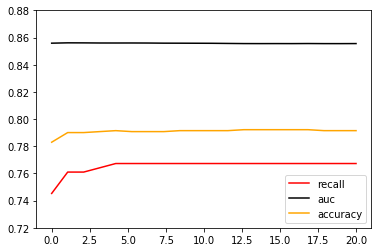

In [95]:
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend(loc=4)
plt.ylim([0.72,0.88])
plt.show()

In [96]:
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
          ,class_weight = "balanced"
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.790071,recall is 0.761006', auc is 0.856100
00:02:407611


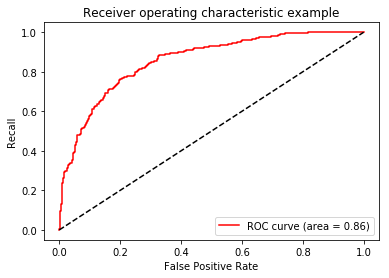

In [97]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt

FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)

area = roc_auc_score(Ytest,clf.decision_function(Xtest))

plt.figure()
plt.plot(FPR, Recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [98]:
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]

-0.011916119080159437

In [101]:
from sklearn.metrics import accuracy_score as AC

times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
          ,class_weight = "balanced"
         ).fit(Xtrain, Ytrain)

prob = pd.DataFrame(clf.decision_function(Xtest))

prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0

#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.788652,recall is 0.767296
00:02:387617
